<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/SVM_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importacion de Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#2. Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'

try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
    print(data.head())  # Mostrar primeras filas para verificación
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    # Si hay error, detener la ejecución
    raise

Mounted at /content/drive
Datos cargados exitosamente!
          Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0  de_inferno  Terrorist               1        4        1       False   
1  de_inferno  Terrorist               1        4        1       False   
2  de_inferno  Terrorist               1        4        1       False   
3  de_inferno  Terrorist               1        4        1       False   
4  de_inferno  Terrorist               1        4        1       False   

   MatchWinner  Survived  AbnormalMatch  RLethalGrenadesThrown  ...  \
0         True     False          False                      0  ...   
1         True     False          False                      0  ...   
2         True     False          False                      0  ...   
3         True     False          False                      0  ...   
4         True      True          False                      1  ...   

   RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0     

#3. Seleccionar las variables

In [ ]:
X = data[['TeamStartingEquipmentValue']].values  # Variable predictora
y = data['RoundStartingEquipmentValue'].values  # Variable objetivo

#4. Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5. Escalar los datos

In [ ]:
scaler_X = RobustScaler(quantile_range=(25, 75))
scaler_y = RobustScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

#6. Crear y entrenar el modelo SVR

In [ ]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.05)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(epsilon=0.05)

#7. Hacer predicciones

In [ ]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

#8. Visualización de resultados

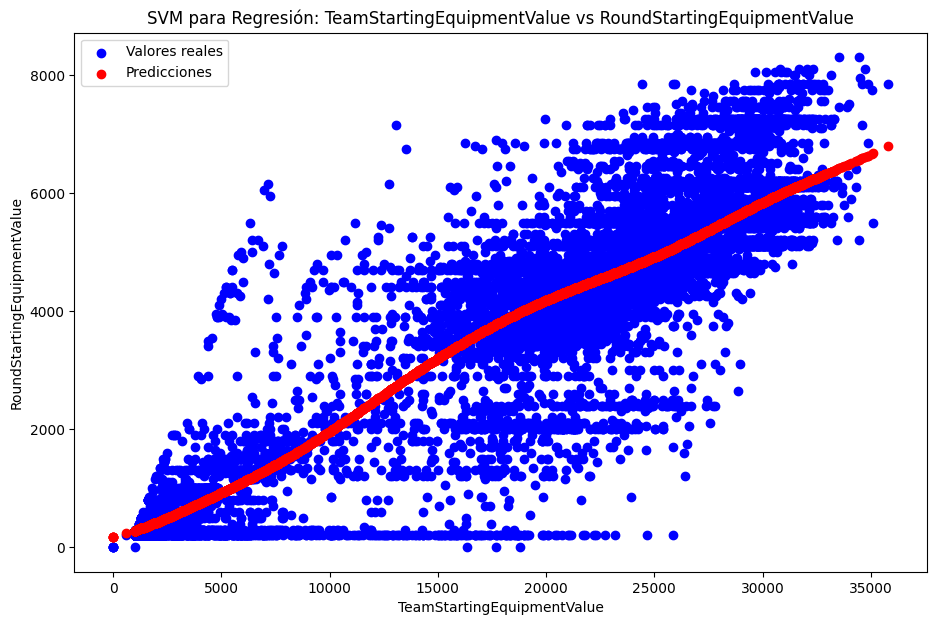

In [ ]:
plt.figure(figsize=(11, 7))
plt.scatter(X_test, y_test, color='blue', label='Valores reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.title('SVM para Regresión: TeamStartingEquipmentValue vs RoundStartingEquipmentValue')
plt.xlabel('TeamStartingEquipmentValue')
plt.ylabel('RoundStartingEquipmentValue')
plt.legend()
plt.show()

El gráfico compara el valor de equipamiento inicial del equipo con el valor por ronda, mostrando tanto los datos reales (azul) como las predicciones de un modelo SVR (rojo). Se observa una relación positiva entre ambas variables, y el modelo predice bien la tendencia general, aunque comete errores más notables en rangos altos (especialmente entre 10,000 y 20,000). Esto puede deberse a datos no lineales o variables no incluidas. El ajuste general del modelo es bueno (R² = 0.85), pero el RMSE elevado (824.63) refleja desviaciones localizadas.

#9. Evaluaccion de desempeño

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 680008.7127
Root Mean Squared Error (RMSE): 824.6264
Mean Absolute Error (MAE): 511.6703
R-squared (R2): 0.85


Precisión del 85% (R² = 0.85): El modelo es altamente predictivo para la mayoría de los casos, capturando bien la relación entre el valor inicial del equipo y el valor por ronda.

---

Error promedio (RMSE = 824): Las predicciones suelen desviarse ±824 unidades del valor real. Esto representa un 2.4% del rango total, lo que es aceptable en términos generales.

---

Desviación típica (MAE = 512): En la mitad de los casos, el modelo no se equivoca más de ±512 unidades, lo que refuerza su utilidad para estimaciones prácticas.

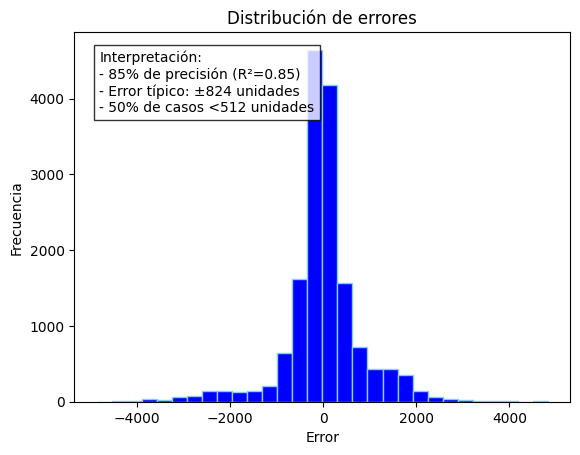

In [ ]:
errores = y_test - y_pred.flatten()

plt.hist(errores, bins=30, color='blue', edgecolor='skyblue')
plt.title('Distribución de errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.text(0.05, 0.95,
         "Interpretación:\n- 85% de precisión (R²=0.85)\n- Error típico: ±824 unidades\n- 50% de casos <512 unidades",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

El modelo tiene una distribución equilibrada ya que la mayoría de errores se concentran cerca de 0 y ademas la forma se asemeja a una campana de Gauss, indicando que la mayoría de errores son pequeños y aleatorios.

# Analisis

## Subestimación en valores altos

Las predicciones (rojo) quedan por debajo de los valores reales (azul) cuando TeamStartingEquipmentValue supera 20,000. El modelo no captura bien los equipos más caros.

## Sobreestimación en valores bajos

Para valores iniciales menores a 5,000, el modelo predice valores ligeramente superiores a los reales. Tiene dificultad con equipos muy económicos.

## Posibles outliers

El modelo falla en predecir valores excepcionalmente altos de RoundStartingEquipmentValue (Y) que ocurren cuando TeamStartingEquipmentValue (X) está entre 10,000-20,000, lo que contribuye al RMSE elevado

## Relación con las métricas

El R² de 0.85 muestra buen ajuste general, pero el RMSE de 824 revela errores considerables en casos específicos, coincidiendo con lo observado en la gráfica.